In [3]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import warnings
warnings.simplefilter("ignore")
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from textblob import TextBlob
import sys
import tweepy
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:NikolPashinyan').get_items()):
    if i>500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

In [21]:
tweets_nikol = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

In [4]:
tweets_nikol = pd.read_csv('nikol.csv')
tweets_nikol.dropna()
tweets_nikol['Tweets'] = tweets_nikol['Tweets'].str.replace('https', '')

In [43]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:edmarukyan').get_items()):
    if i>2500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
tweets_ed = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

In [5]:
#tweets_ed.to_csv('marukyan.csv')
tweets_ed = pd.read_csv('marukyan.csv')
tweets_ed.dropna()
tweets_ed['Tweets'] = tweets_ed['Tweets'].str.replace('https', '')

In [32]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:AraratMirzoyan').get_items()):
    if i>2500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    
tweets_ar = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])

In [6]:
#tweets_ar.to_csv('mirzoyan.csv')
tweets_ar = pd.read_csv('mirzoyan.csv')
tweets_ar.dropna()
tweets_ar['Tweets'] = tweets_ar['Tweets'].str.replace('https', '')

In [35]:
attributes_container = []

for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:atatoyan').get_items()):
    if i>2500:
        break
    attributes_container.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
    

tweets_tatoyan = pd.DataFrame(attributes_container, columns=["Date Created", "Number of Likes", "Source of Tweet", "Tweets"])
tweets_tatoyan.to_csv('tatoyan.csv')
tweets_tatoyan = pd.read_csv('tatoyan.csv')
tweets_tatoyan.dropna()
tweets_tatoyan['Tweets'] = tweets_tatoyan['Tweets'].str.replace('https', '')
tweets_tatoyan['Tweets'] = tweets_tatoyan['Tweets'].str.replace('https', '')
tweets_tatoyan['Tweets'] = tweets_tatoyan['Tweets'].str.replace('co', '')
tweets_tatoyan['Tweets'] = tweets_tatoyan['Tweets'].str.replace('amp', '')

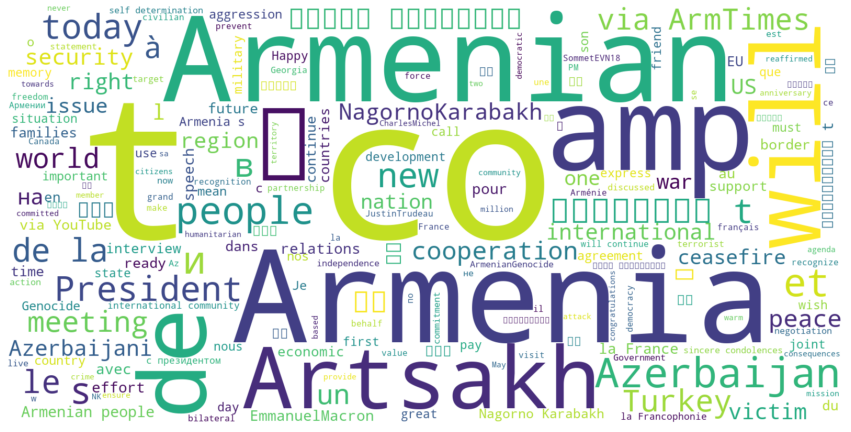

In [25]:
text = " ".join(i for i in tweets_nikol.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

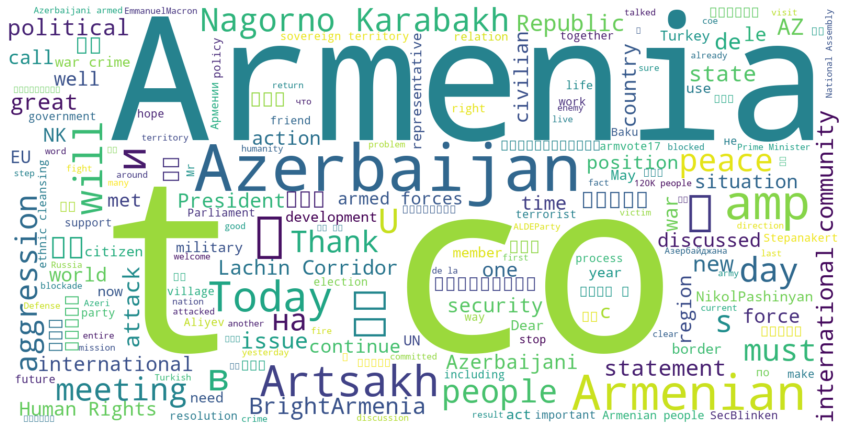

In [36]:
text = " ".join(i for i in tweets_ed.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
tweets_nikol['Date Created'] = pd.to_datetime(tweets_nikol['Date Created'])
tweets_nikol['year'] = tweets_nikol['Date Created'].apply(lambda x: x.year)

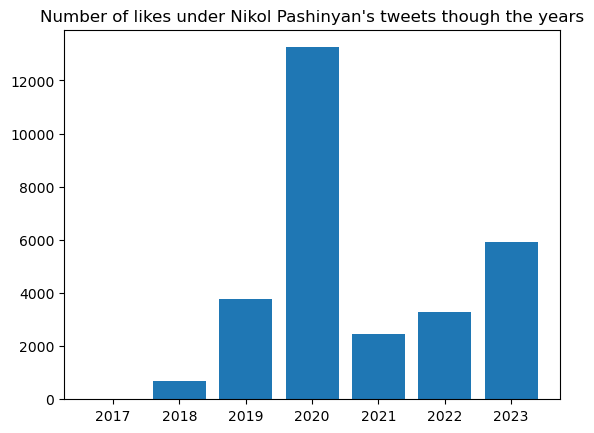

In [17]:
plt.bar(tweets_nikol['year'], tweets_nikol['Number of Likes'])
plt.title("Number of likes under Nikol Pashinyan's tweets though the years")
plt.savefig('likes.png')

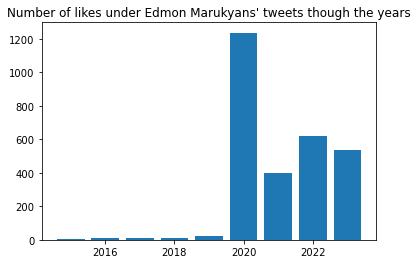

<Figure size 1080x1080 with 0 Axes>

In [53]:
tweets_ed['Date Created'] = pd.to_datetime(tweets_ed['Date Created'])
tweets_ed['year'] = tweets_ed['Date Created'].apply(lambda x: x.year)
plt.bar(tweets_ed['year'], tweets_ed['Number of Likes'])
plt.title("Number of likes under Edmon Marukyans' tweets though the years")
plt.figure(figsize=(15, 15))
plt.savefig('ed.png')

<BarContainer object of 163 artists>

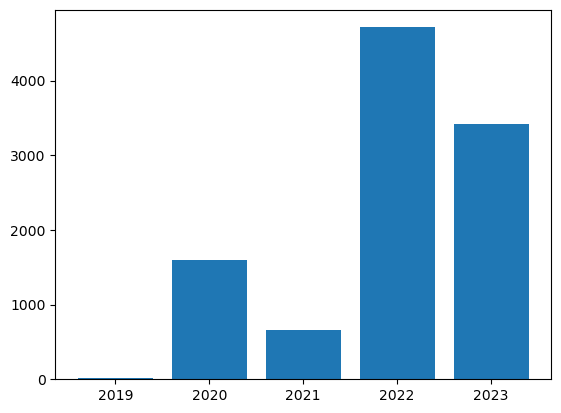

In [14]:
tweets_ar['Date Created'] = pd.to_datetime(tweets_ar['Date Created'])
tweets_ar['year'] = tweets_ar['Date Created'].apply(lambda x: x.year)
plt.bar(tweets_ar['year'], tweets_ar['Number of Likes'])

In [18]:
#tweets_nikol['Date'] = tweets_nikol['Date Created'].dt.date
#del tweets_nikol['Date Created']


In [7]:
after = tweets_nikol.head(153)
after

,Date Created,Number of Likes,Source of Tweet,Tweets
0,2023-03-23 12:50:27+00:00,1565,Twitter Web App,There will be a #peace treaty between #Armenia...
1,2023-02-13 10:38:12+00:00,463,Twitter for iPhone,"Dear Mr. @Christodulides, I'd like to extend m..."
2,2023-02-06 08:57:57+00:00,5896,Twitter Web App,Saddened by the news of the devastating earthq...
3,2023-01-05 14:31:05+00:00,1335,Twitter for iPhone,Merry Christmas to all Armenians around the wo...
4,2022-12-19 05:42:07+00:00,1227,Twitter Web App,8 days Lachin corridor is closed by #Az and pe...
...,...,...,...,...
148,2020-09-27 14:30:23+00:00,5718,Twitter for iPhone,#Armenia is guarantor of the security and inde...
149,2020-09-27 13:37:23+00:00,13227,Twitter for iPhone,I call on the international community to use a...
150,2020-09-27 09:15:39+00:00,8734,Twitter for iPhone,"At the decision of the Government, martial law..."
151,2020-09-27 07:53:17+00:00,3641,Twitter for iPhone,Recent aggressive statements of #Azerbaijan'i ...


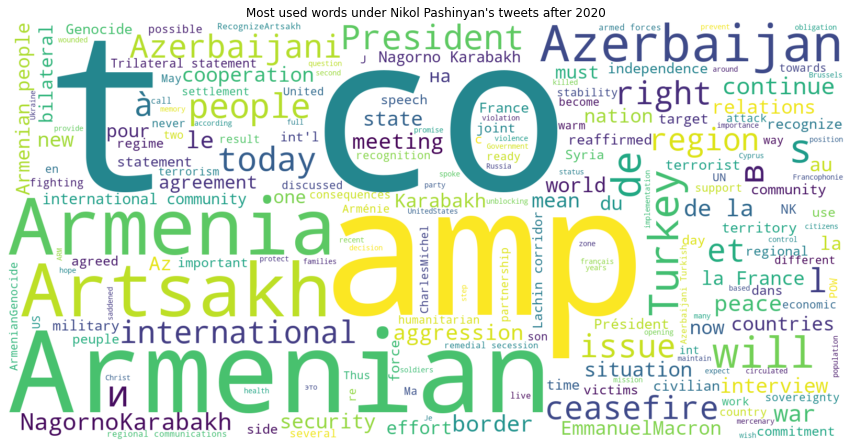

In [47]:
text = " ".join(i for i in after.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Nikol Pashinyan's tweets after 2020")
plt.savefig('wordcloudafter.png')
plt.show()

In [8]:
before = tweets_nikol.tail(348)
before

,Date Created,Number of Likes,Source of Tweet,Tweets
153,2020-09-26 15:16:28+00:00,888,Twitter for iPhone,I would like to express sincere condolences to...
154,2020-09-25 18:21:15+00:00,835,Twitter for iPhone,#Armenia reaffirms its commitment to exclusive...
155,2020-09-25 17:24:01+00:00,468,Twitter for iPhone,"On the #UN75 anniversary, we are compelled to ..."
156,2020-09-22 11:04:35+00:00,487,Twitter for iPhone,"Today, just like 75 years ago, the core task o..."
157,2020-09-21 11:39:34+00:00,458,Twitter for iPhone,Strategic actions aimed at Armenia’s developme...
...,...,...,...,...
496,2017-11-20 09:25:28+00:00,3,Twitter Web Client,"Այն, ինչ կատարվում է Վանաձորում, դե յուրե դիակ..."
497,2017-11-20 07:51:25+00:00,4,Twitter Web Client,ՌԴ ՊՆ պաշտոնական հեռուստաալիքն ընդհանրացրել է ...
498,2017-11-17 07:30:50+00:00,3,Twitter for iPhone,"Հայաստանում աղքատներ չկան, ուռա՛, բարեկամներ. ..."
499,2017-11-16 09:44:48+00:00,3,Twitter for iPhone,"Կլոր գլուխ, քառակուսի սեղան, կամ հակառակը. խմբ..."


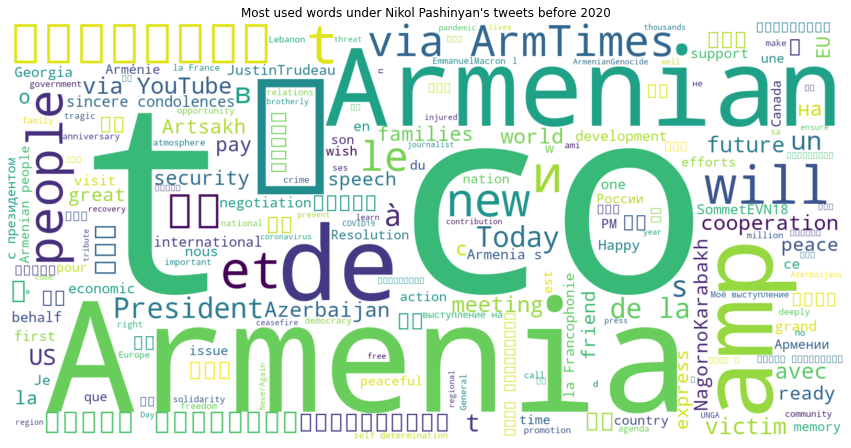

In [49]:
text = " ".join(i for i in before.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most used words under Nikol Pashinyan's tweets before 2020")
plt.savefig('wordcloudbefore.png')
plt.show()

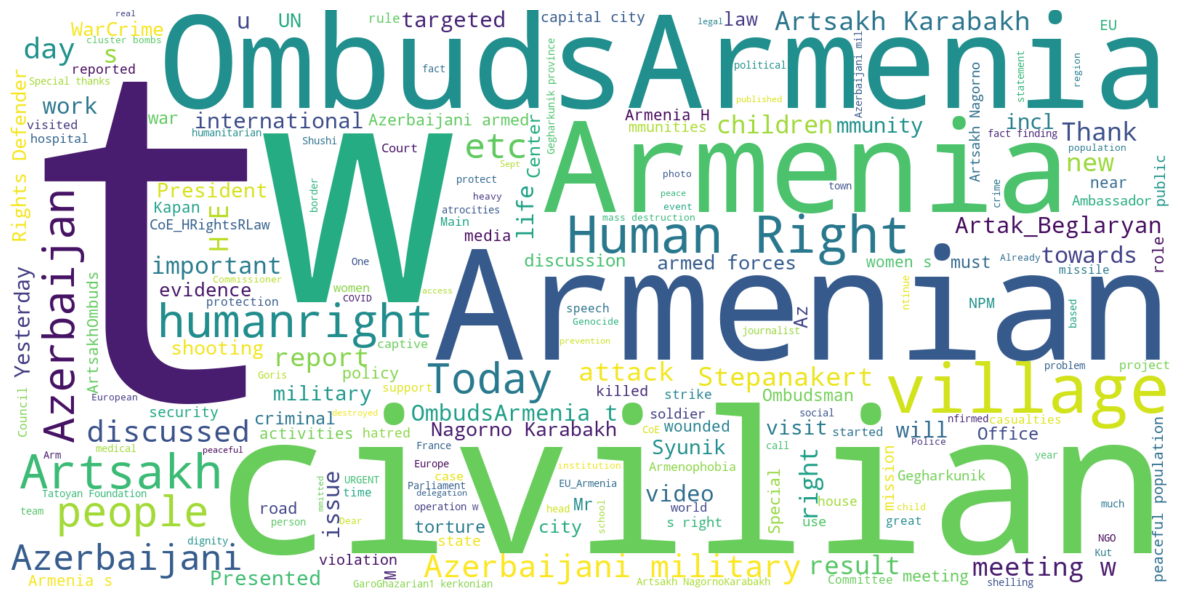

In [47]:
text = " ".join(i for i in tweets_tatoyan.Tweets)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.title("Most used words under Nikol Pashinyan's tweets before 2020")
#plt.savefig('wordcloudbefore.png')
plt.show()

In [10]:
from textblob import TextBlob   
tweets_nikol['polarity'] = tweets_nikol['Tweets'].apply(lambda x: TextBlob(x).polarity)

In [11]:
label = []
for pol in tweets_nikol['polarity']:
    if 0 < pol <= 1.0 :    label.append('positive')
    elif -1.0 <= pol < 0:   label.append('negative')
    elif pol == 0:  label.append('neutral')

In [12]:
tweets_nikol['label'] = label

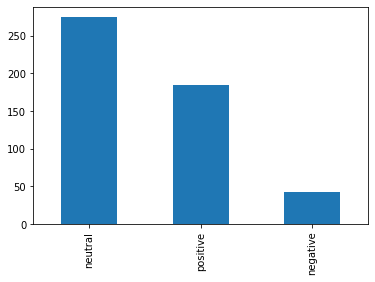

In [13]:
tweets_nikol.label.value_counts().plot(kind='bar')

In [14]:
after = tweets_nikol.head(153)

In [15]:
before = tweets_nikol.tail(348)

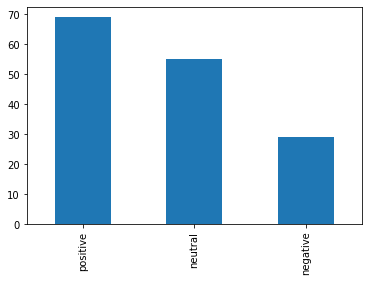

In [16]:
after.label.value_counts().plot(kind='bar')

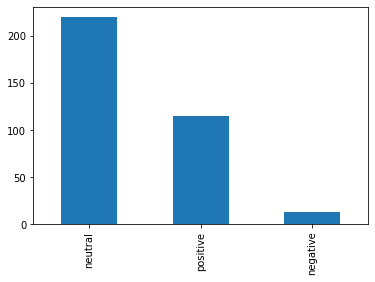

In [17]:
before.label.value_counts().plot(kind='bar')